<a href="https://colab.research.google.com/github/Padmanabha8/WeatherPrediction/blob/main/INT248Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import io
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline                                                                  

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing

In [5]:
weather_df = pd.read_csv("/content/drive/My Drive/weatherHistory.csv")

In [6]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
weather_df.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [8]:
weather_df.shape

(96453, 12)

In [9]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
weather_df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [12]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [13]:
weather_df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [14]:
weather_df.loc[weather_df["Precip Type"].isnull(),"Precip Type"]="rain"

In [15]:
weather_df.loc[weather_df["Precip Type"]=="rain","Precip Type"]=1
weather_df.loc[weather_df["Precip Type"]=="snow","Precip Type"]=0

In [16]:
weather_df_num = weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]


In [17]:
weather_y = weather_df_num.pop("Temperature (C)")
weather_x = weather_df_num

In [18]:
train_x,test_x,train_y,test_y = train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [19]:
train_x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87
52457,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36
90690,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75
69528,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56
92419,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05


Linear Regression Model

In [20]:
model1 = LinearRegression()
model1.fit(train_x,train_y)

prediction1 = model1.predict(test_x)
np.mean((prediction1-test_y)**2)

0.902274371188337

In [21]:
 a=pd.DataFrame({'actual':test_y,'prediction':prediction1,'diff':(test_y-prediction1)})
 a

,actual,prediction,diff
37443,-2.288889,-3.355714,1.066825
86534,8.861111,9.418530,-0.557419
2082,9.805556,9.701321,0.104235
53130,27.222222,27.096837,0.125385
45196,17.705556,17.302053,0.403503
...,...,...,...
55387,-10.066667,-11.960987,1.894320
25976,9.972222,9.831699,0.140523
32423,12.777778,15.436904,-2.659127
26570,15.277778,16.307788,-1.030010


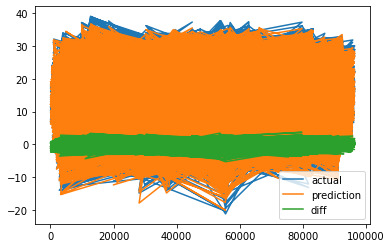

In [22]:
a.plot()

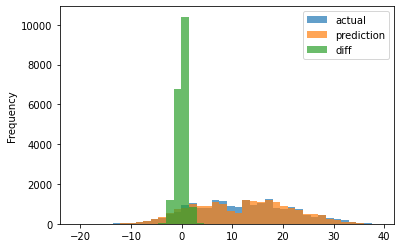

In [23]:
a.plot.hist(bins=40,alpha=0.7)

Polynomial Regression 

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(train_x)

poly.fit(x_poly,train_y)
model2 = LinearRegression()
model2.fit(x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
prediction2 = model2.predict(poly.fit_transform(test_x))
np.mean((prediction2 -test_y)**2)

0.14602317508410181

In [27]:
b = pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})
b

,actual,prediction,diff
37443,-2.288889,-2.188155,-0.100734
86534,8.861111,9.113336,-0.252225
2082,9.805556,9.602271,0.203285
53130,27.222222,27.130414,0.091808
45196,17.705556,17.770751,-0.065196
...,...,...,...
55387,-10.066667,-10.172420,0.105753
25976,9.972222,9.773758,0.198464
32423,12.777778,13.294539,-0.516761
26570,15.277778,15.414607,-0.136829


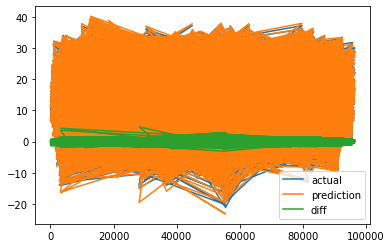

In [28]:
b.plot()

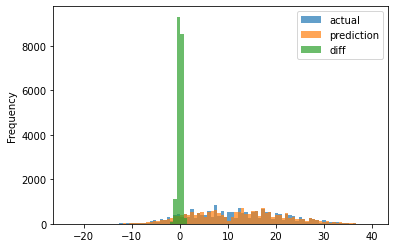

In [29]:
b.plot.hist(bins=90,alpha=0.7)

Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
prediction3 = regressor.predict(test_x)
np.mean((prediction3 - test_y)**2)

0.006723574480775507

In [32]:
c = pd.DataFrame({'actual':test_y,'prediction':prediction3,'diff':(test_y-prediction3)})
c

,actual,prediction,diff
37443,-2.288889,-2.272222,-1.666667e-02
86534,8.861111,8.855556,5.555556e-03
2082,9.805556,9.788889,1.666667e-02
53130,27.222222,27.222222,-3.552714e-15
45196,17.705556,17.705556,-7.105427e-15
...,...,...,...
55387,-10.066667,-10.000000,-6.666667e-02
25976,9.972222,9.972222,0.000000e+00
32423,12.777778,12.777778,-4.263256e-14
26570,15.277778,15.277778,3.552714e-15


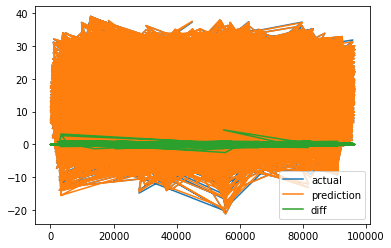

In [33]:
c.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca888f6d68>,
      dtype=object)

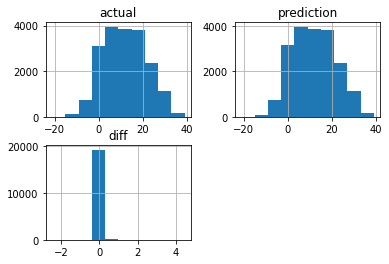

In [34]:
c.hist()

Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
prediction4 =regr.predict(test_x)
np.mean((prediction4 - test_y)**2)

0.001618068523446305

In [37]:
d = pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})
d

,actual,prediction,diff
37443,-2.288889,-2.274056,-1.483333e-02
86534,8.861111,8.860056,1.055556e-03
2082,9.805556,9.823222,-1.766667e-02
53130,27.222222,27.209722,1.250000e-02
45196,17.705556,17.705556,2.131628e-14
...,...,...,...
55387,-10.066667,-10.126389,5.972222e-02
25976,9.972222,9.966278,5.944444e-03
32423,12.777778,12.777778,-4.440892e-14
26570,15.277778,15.277778,-2.842171e-14


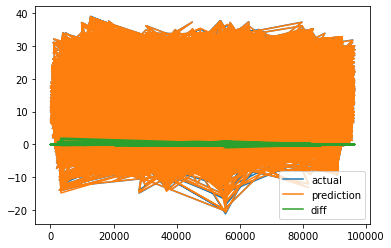

In [38]:
d.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca86761d30>,
      dtype=object)

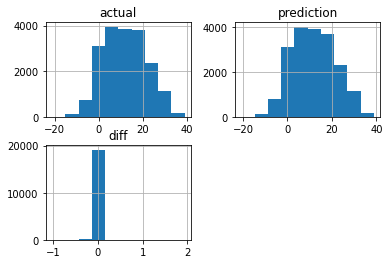

In [39]:
d.hist()

LSTM Model


In [43]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout , Bidirectional

import math
import matplotlib.pyplot as plt

In [44]:
temperature_df=weather_df[['Temperature (C)']]
temperature_df

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [45]:
train_split = 0.8
split_index = int (len(weather_df) * 0.8)

training_set = temperature_df[:split_index].values
test_set = temperature_df[split_index:].values

In [46]:
x_train = []
y_train = []
n_future = 20
n_past = 200

for i in range(0,len(training_set)- n_past - n_future + 1):
  x_train.append(training_set[i:i+n_past,0])
  y_train.append(training_set[i + n_past : i + n_past + n_future,0])

In [47]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [83]:
x_test = test_set[: n_past, 0]
y_test = test_set[n_past : n_past + n_future, 0]

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (1,x_test.shape[0], 1))

In [73]:
EPOCHS = 1
BATCH_SIZE = 128

regressor = Sequential()

regressor.add(Bidirectional(LSTM(units=256,
                                 return_sequences=True )))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=256,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=256,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=256))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=n_future,activation='relu'))


In [84]:
regressor.compile(optimizer='adam',loss='mae')

regressor.fit(x_train,y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)

602/602 [==============================] - 140s 233ms/step - loss: 2.5754


In [51]:
predicted_temperature = regressor.predict(x_test)

print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(y_test))

Predicted temperature [[17.898531 17.788416 17.14517  16.303217 15.087076 14.212762 13.140704
  12.252716 11.408574 10.948512 10.313635 10.009767  9.598201  9.282884
   8.932292  8.955679  9.353906 10.204091 11.513225 13.05945 ]]
Real temperature [17.28888889 17.21666667 16.17777778 14.92777778 14.88333333 14.9
 13.84444444 13.31111111 13.12222222 13.37777778 13.33333333 13.05
 13.28888889 13.31111111 13.75       13.81666667 13.79444444 13.69444444
 14.86111111 17.01666667]


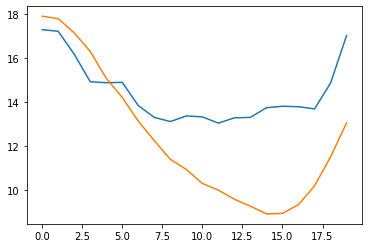

In [52]:
plt.plot(y_test)
plt.plot(predicted_temperature[0])
